<a href="https://colab.research.google.com/github/qnqatop/nanolab_scripts/blob/main/GIF_Create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Скрипт для создания динамически строящегося графика

### Инструкция

для создания графика нужно подготовить наш файл:

1 - создать отдельный csv файл c двумя колонками.

2 - первая колонка должна называться просто "E".

3 - вторая колонка должна называться просто "I".

Пример:

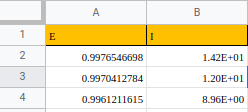

4 - во всем файле нужно заменить "," на "."

5 - файл нужно назвать "gif.csv" и выбрать разделитель ';'(разделитель точка с запятой)

1) Слева от вас имеется вертикальный столбик нужно нажать на значек папки("Файлы").


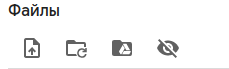


2) Под "Файлы" имеется первый значек\картинка при наведении на него будет написано "Загрузить в сессионное хранилище".

3) Нажимаем и подгружаем подготовленный за ранее файл.

Для выполнения скрипта убедитесь, что вы положили файл как нужно и провели все манипуляции с ним

Нажмите на "Среда выполнения" на верху и выберите "Выполнить все "

После выполнения скрипта у вас появится файл с разрешением .gif

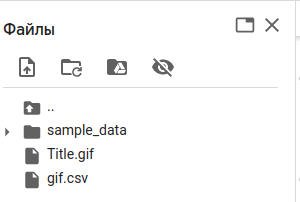


в ячейке ниже вас попросят ввести :

1) цвет графика

2) заголовок графика

3) название осей

4) кол-во циклов

 После ввода слов просто нажимайте на Enter для присваивания значения.

Нужно подождать примерно 10 секунд что бы все процесы выполнились, после этого можно нажать на второй значек для обновления.

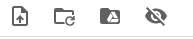



### Если хотите задать определнный цвет графику

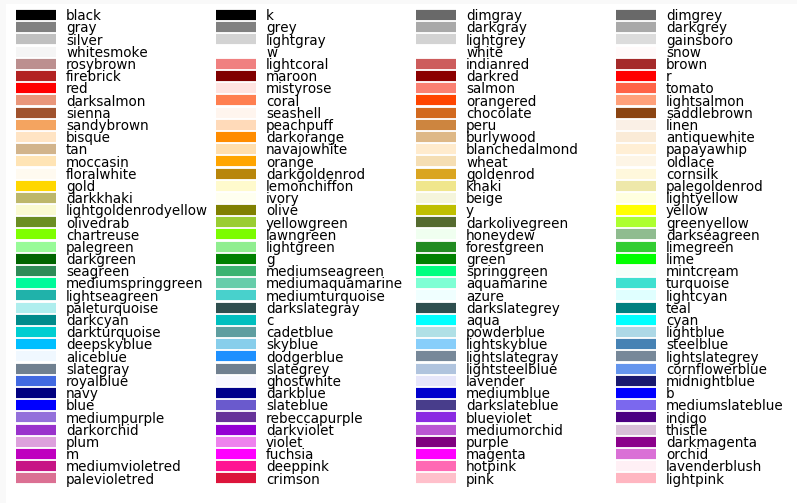

``
На картинке выше представлены возможные цвета для построения графиков, если хотите указать какой-либо цвет правильно перепешите в ячейку название без ошибок
``

``
Если не хотите присваивать определенный цвет просто нажмите Enter, тогда цвет будет выбран стандартно - синий для основного графика и красный для определенных циклов.
``

In [ ]:
color = input('Введити цвет основного графика графика: ')
color_last_cycle = input('Введите цвет для  последнего цикла: ')
color_first_cycle = input('Введите цвет для первого цикла: ')

### код скрипта

In [ ]:
title = input('Введите название заголовка графика: ')
x_l = input('Введите название оси Х графика: ')
y_l = input('Введите название оси У графика: ')
count_cycle = int(input('Введите кол-во циклов: '))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from PIL import Image
import os, glob
from pathlib import Path

In [ ]:
df = pd.read_csv('gif.csv', sep=';')

In [ ]:
if 10 >= count_cycle:
  count = 50
else:
  count = 2000

if color == '':
  color = 'b'

if color_last_cycle == '':
  color_last_cycle = 'r'
if color_first_cycle == '':
  color_first_cycle = color_last_cycle

In [ ]:
n = 1
name_derictory = f'{title}'
number = 1
x = df.E.values
y = df.I.values
x_array = []
y_array = []
derictory_create = os.mkdir(f'{name_derictory}')

In [ ]:
for i in range(df.shape[0]+1):
  x_array.append(x[i])
  y_array.append(y[i])
  
  if n%count == 0:
    if number == 98 and count == 2000:
      plt.plot(x[:2000],y[:2000],f'{color_first_cycle}')
      plt.plot(x[194000:],y[194000:],f'{color_last_cycle}')
      plt.savefig(f'{name_derictory}/gif_{number}.png')
      number+=1
    else:
      plt.plot(x_array,y_array,color = f'{color}')
      plt.xlabel(f'{x_l}')
      plt.ylabel(f'{y_l}')
      plt.title(f'{title}')
      plt.savefig(f'{name_derictory}/gif_{number}.png')
      number+=1
  n+=1
  if n == df.shape[0]+1:
    break
print(number-1,'- кол-во скринов')

In [ ]:
name = name_derictory

folder = Path(f'{name_derictory}/')
if folder.is_dir():
    folder_count = len([1 for file in folder.iterdir()])

In [ ]:
# Список для хранения кадров.
frames = []
 
for frame_number in range(1,folder_count + 1 ):
    # Открываем изображение каждого кадра.
    frame = Image.open(f'{name_derictory}/gif_{frame_number}.png')
    # Добавляем кадр в список с кадрами.
    frames.append(frame)
 
# Берем первый кадр и в него добавляем оставшееся кадры.
frames[0].save(
    f'{name}.gif',
    save_all=True,
    append_images=frames[1:],  # Срез который игнорирует первый кадр.
    optimize=True,
    duration=400,
)

In [ ]:
for file in glob.glob(f'{name_derictory}/*'):
    os.remove(file)
os.rmdir(f'{name_derictory}')